In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.set_option('display.max_columns', None)
working_dir = ''
output_dir = ''

In [18]:
df = pd.read_csv(working_dir + 'train.csv')

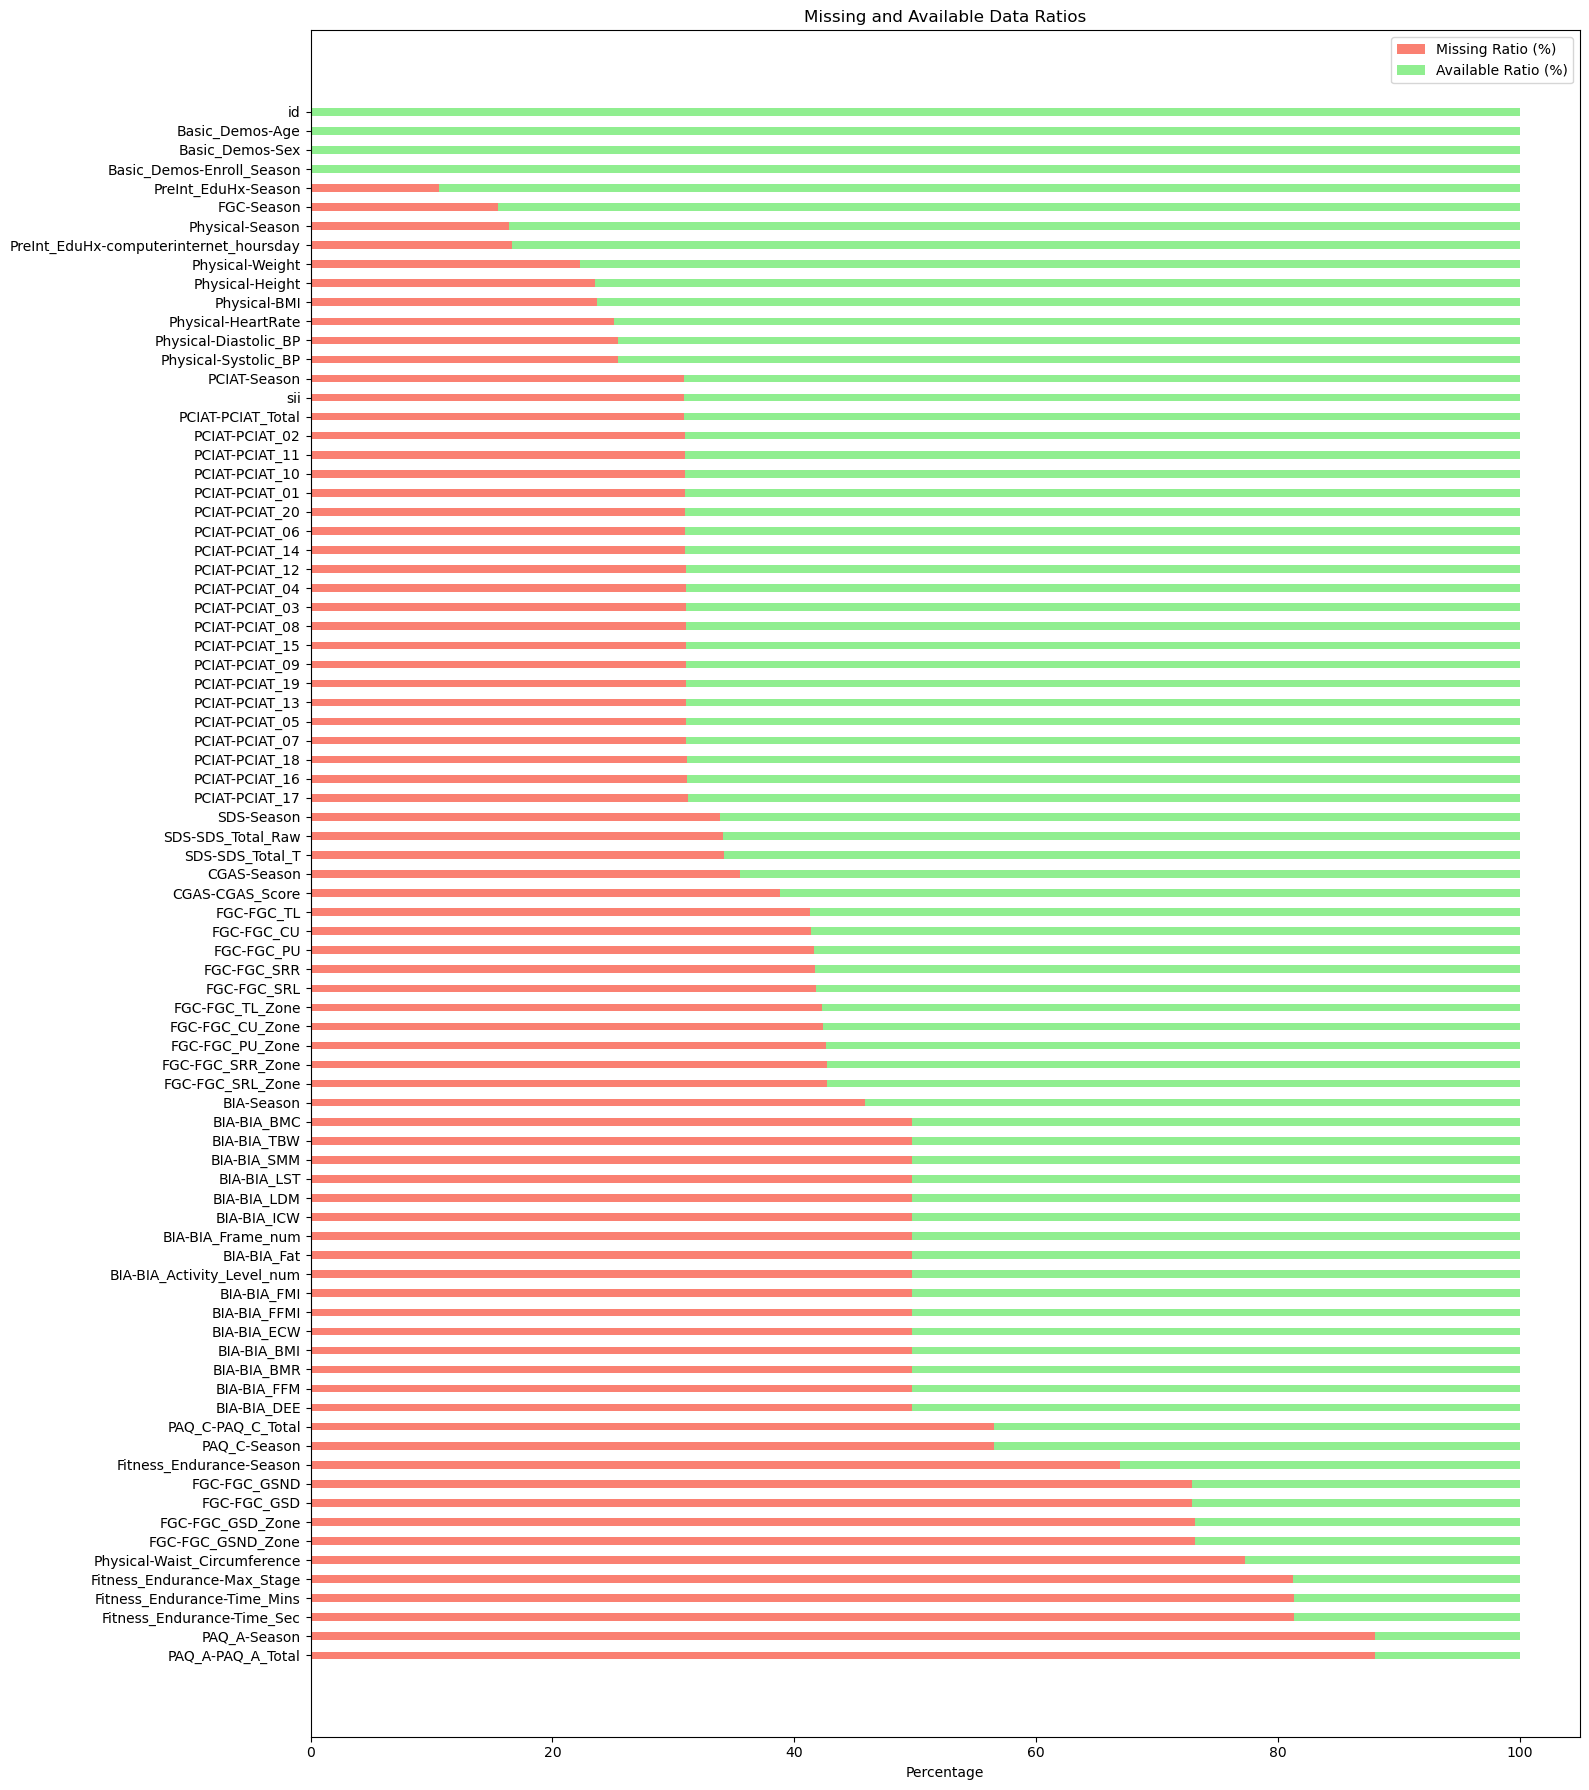

3960

In [19]:
def plot_nas(df: pd.DataFrame):
    # Calculate the missing and available data ratios
    na_df = (df.isnull().sum() / len(df)) * 100  # Missing ratio in percentage
    na_df = na_df.sort_values(ascending=False)  # Sort values
    
    available_df = 100 - na_df  # Available ratio in percentage
    
    # Create a horizontal stacked bar chart
    plot_width, plot_height = (16, 18)
    plt.rcParams['figure.figsize'] = (plot_width, plot_height)
    
    fig, ax = plt.subplots()
    bar_height = 0.4  # Set bar height to make them thinner
    y_pos = np.arange(len(na_df))  # Positions for bars
    
    ax.barh(y_pos, na_df, color='salmon', label='Missing Ratio (%)', height=bar_height)
    ax.barh(y_pos, available_df, left=na_df, color='lightgreen', label='Available Ratio (%)', height=bar_height)
    
    ax.set_yticks(y_pos)
    ax.set_yticklabels(na_df.index)
    ax.set_xlabel('Percentage')
    ax.set_title('Missing and Available Data Ratios')
    ax.legend()
    plt.tight_layout()
    plt.show()

plt.rcParams['figure.figsize'] = (3,3)
plot_nas(df)

len(df)

In [20]:
# Trim column by sii and pciat
df = df.loc[: ,~df.columns.str.contains('season', case=False)]

pciat_columns = [col for col in df.columns if col.split(sep='-')[0] == 'PCIAT']
df = df.drop(columns=['id'])
pciat_columns.append('sii')
df = df.dropna(subset=pciat_columns)
df = df.dropna(subset='sii')
df.head(5)
len(df)

2671

In [5]:
# Dropping all data with > 40% missing ratio
dropped_cols = []
columns = df.columns
for col in columns:
    missing_ratio = df[col].isna().sum() / len(df)
    if missing_ratio > 0.4:
        df = df.drop(columns=col)
        dropped_cols.append(col)

print('Dropped: ')
print(dropped_cols)

Dropped: 
['Physical-Waist_Circumference', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'PAQ_A-PAQ_A_Total', 'PAQ_C-PAQ_C_Total']


In [6]:
df.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,2671.000000,2671.000000,2288.000000,2466.000000,2469.000000,2510.000000,2417.000000,2425.000000,2417.000000,1876.000000,1841.000000,1867.000000,1833.000000,1868.000000,1834.000000,1870.000000,1836.000000,1876.000000,1842.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,1771.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2671.000000,2471.000000,2470.000000,2590.000000,2671.000000
mean,10.205541,0.365032,65.132430,19.116424,55.853880,87.658697,69.745552,81.938557,117.079437,11.881130,0.525801,5.740761,0.344244,8.775268,0.638495,8.875374,0.634532,9.121242,0.775244,2.672501,6.993058,19.215122,1234.344029,2065.425189,20.706039,73.736873,14.951532,4.263591,15.794107,1.733484,33.032116,19.998725,66.743816,34.186554,53.738155,2.358293,2.168476,2.386747,0.822538,2.285661,1.050168,0.578809,1.232872,1.052789,1.296518,1.673156,0.240734,1.330213,1.021715,1.478847,1.434669,1.617746,1.600150,1.147510,0.929240,27.706851,40.927964,57.582186,1.005792,0.572070
std,3.413685,0.481529,11.821454,4.915538,7.392539,43.317047,13.787119,13.822869,17.206969,11.998855,0.499470,7.433180,0.475251,3.292636,0.480567,3.318378,0.481692,2.956121,0.417535,1.029522,98.165421,4.921272,1981.453289,2995.698856,77.537671,211.051166,5.912054,6.472673,211.125767,0.671538,59.447552,74.363473,114.552084,88.748672,136.816939,1.671541,1.694250,1.588287,1.183830,1.704921,1.259165,1.040232,1.335086,1.252048,1.328055,1.538235,0.518644,1.407943,1.293420,1.482552,1.484294,1.443664,1.522978,1.335749,1.172664,20.282070,10.216942,13.015597,1.078050,0.766791
min,5.000000,0.000000,25.000000,0.000000,36.000000,0.000000,11.000000,27.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-7.789610,0.048267,813.397000,1073.450000,1.789450,28.900400,7.864850,-194.163000,-8745.080000,1.000000,17.845000,4.635810,23.620100,11.382500,20.589200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.763163,50.000000,57.000000,61.000000,73.000000,107.000000,4.000000,0.000000,0.000000,0.000000,7.000000,0.000000,7.000000,0.000000,7.000000,1.000000,2.000000,2.962125,15.839650,1003.935000,1604.690000,11.056950,49.195050,13.378000,2.272980,8.416370,1.000000,24.320950,12.914350,45.013650,21.059950,35.769600,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.797466,55.000000,75.800000,68.000000,81.000000,11

In [7]:
num_columns = [col for col in df.columns if 
              (col.split(sep='-')[0] != 'PCIAT' and col.split(sep='-')[0] != 'sii'
                  and col != 'id'
              )
          ]

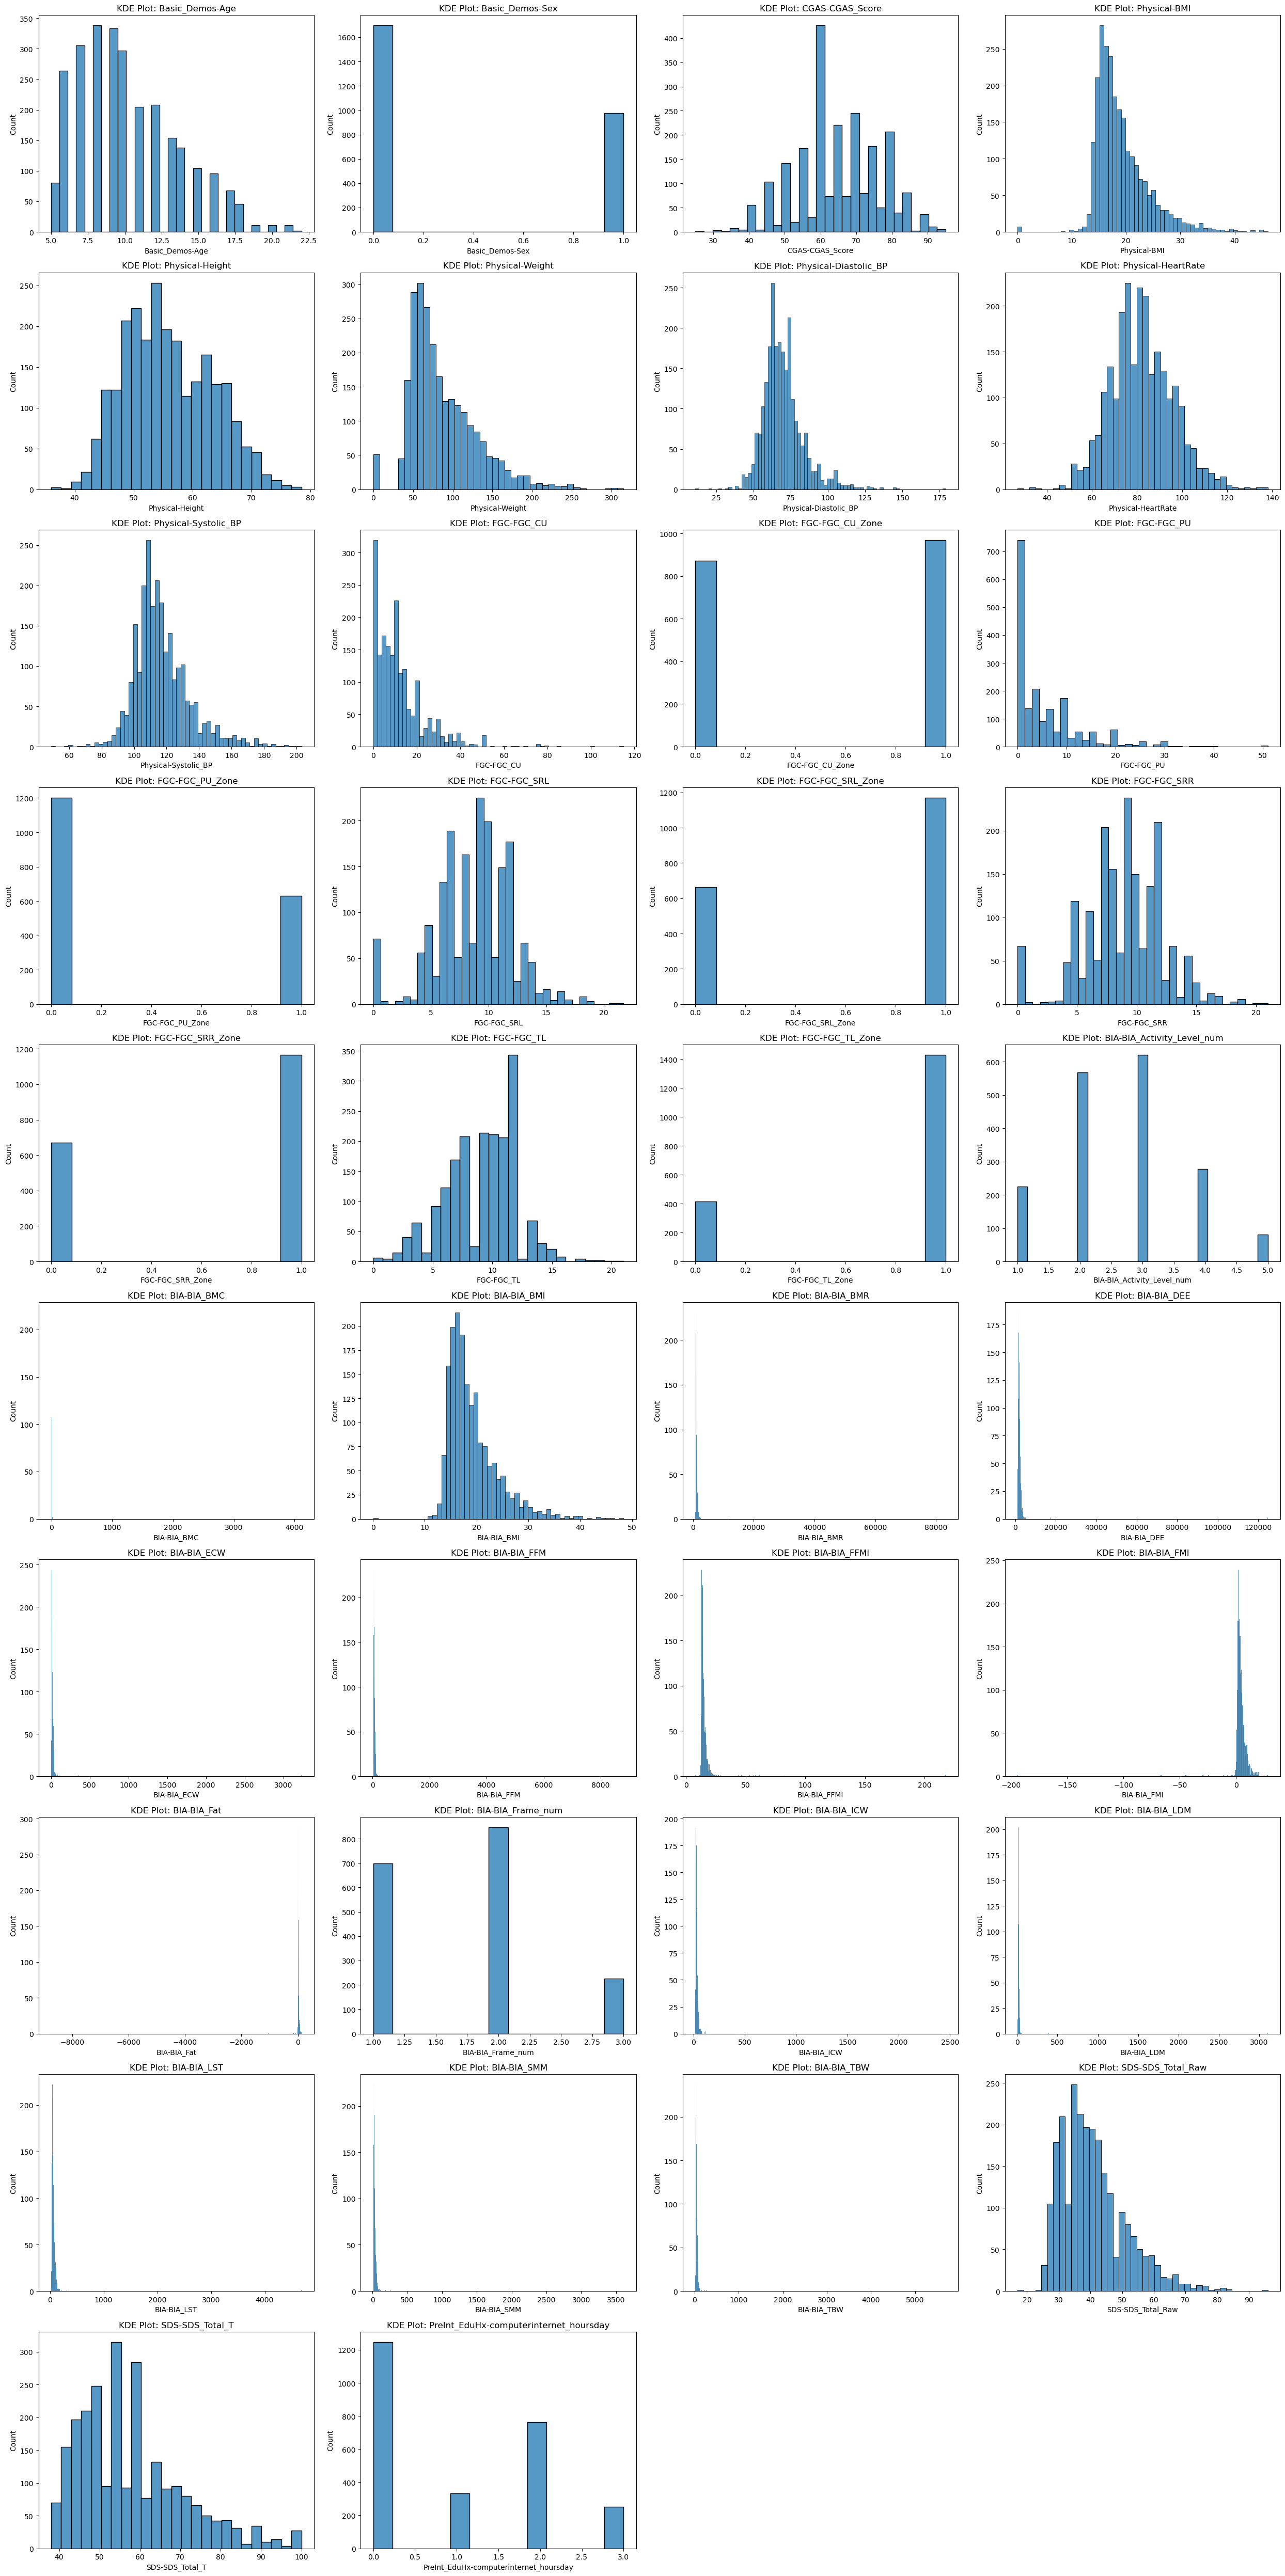

In [8]:
fig, axes = plt.subplots(10,4,figsize=(25,50))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(df[col], label=col, ax=axes[i])
    axes[i].set_title(f"KDE Plot: {col}")

for j in range(len(num_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
# General quantile capping
feature_cap = {}
for col in num_columns:
    if col == 'id':
        continue
    feature_cap[col] = {
        'lower': df[col].quantile(0.01),
        'upper': df[col].quantile(0.99)
    }
    df[col] = df[col].clip(df[col].quantile(0.01), df[col].quantile(0.99))

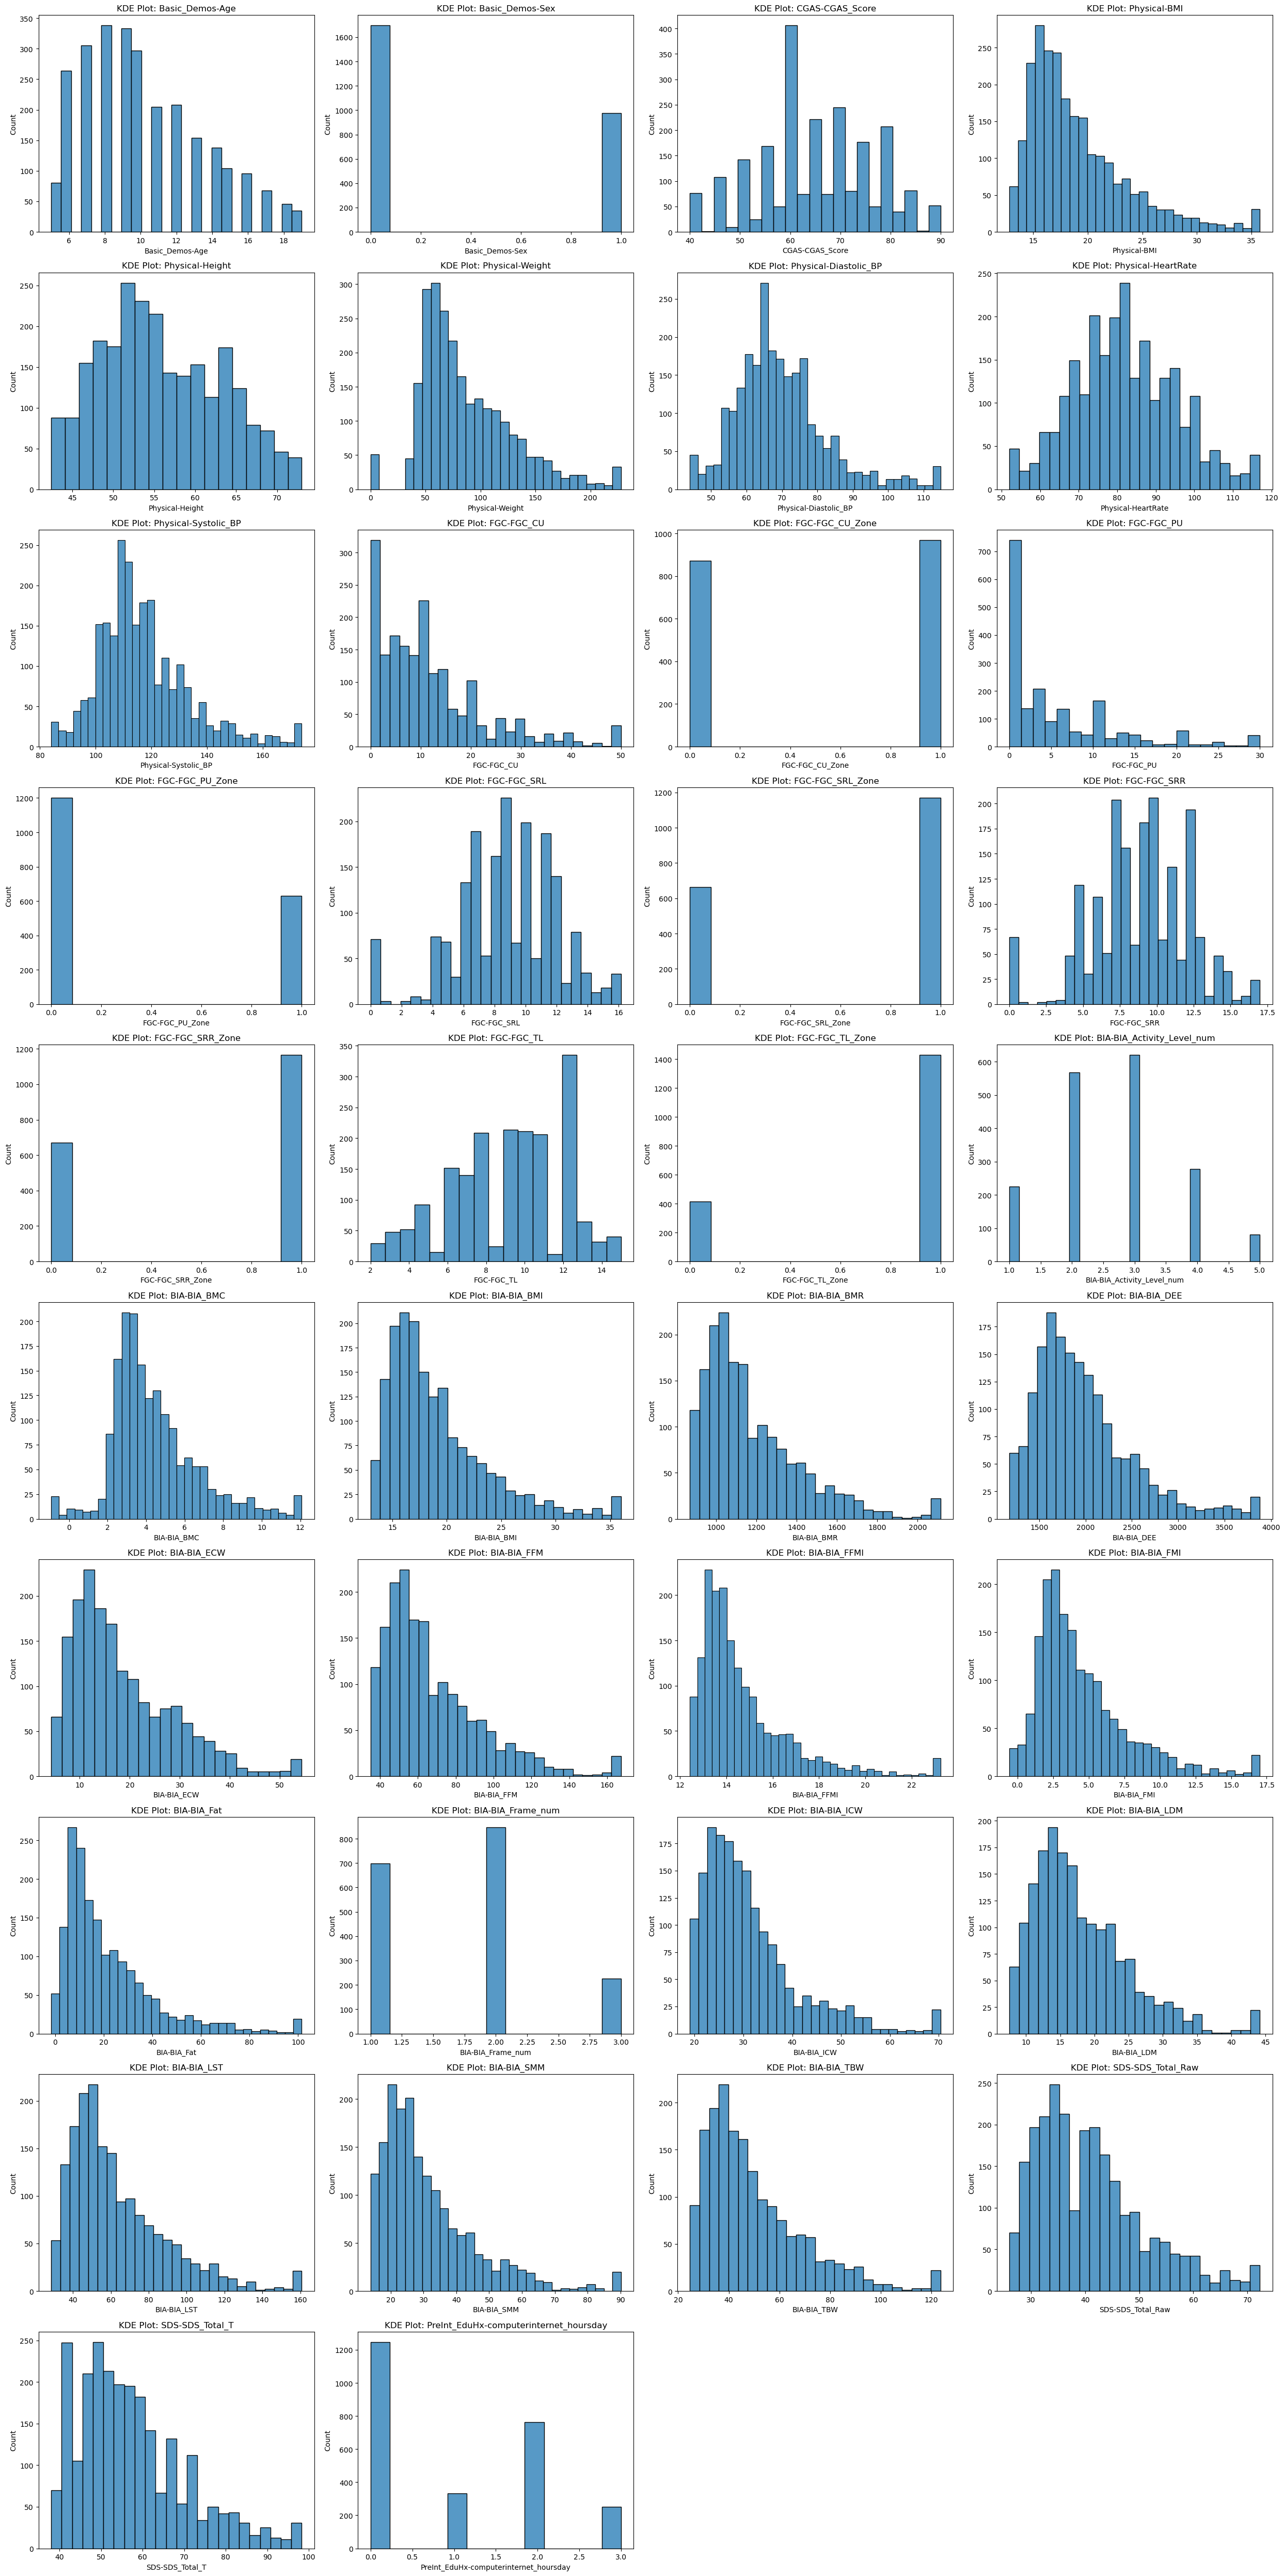

In [10]:
fig, axes = plt.subplots(10,4,figsize=(25,50))
axes = axes.flatten()

for i, col in enumerate(num_columns):
    sns.histplot(df[col], label=col, ax=axes[i])
    axes[i].set_title(f"KDE Plot: {col}")

for j in range(len(num_columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<Axes: >

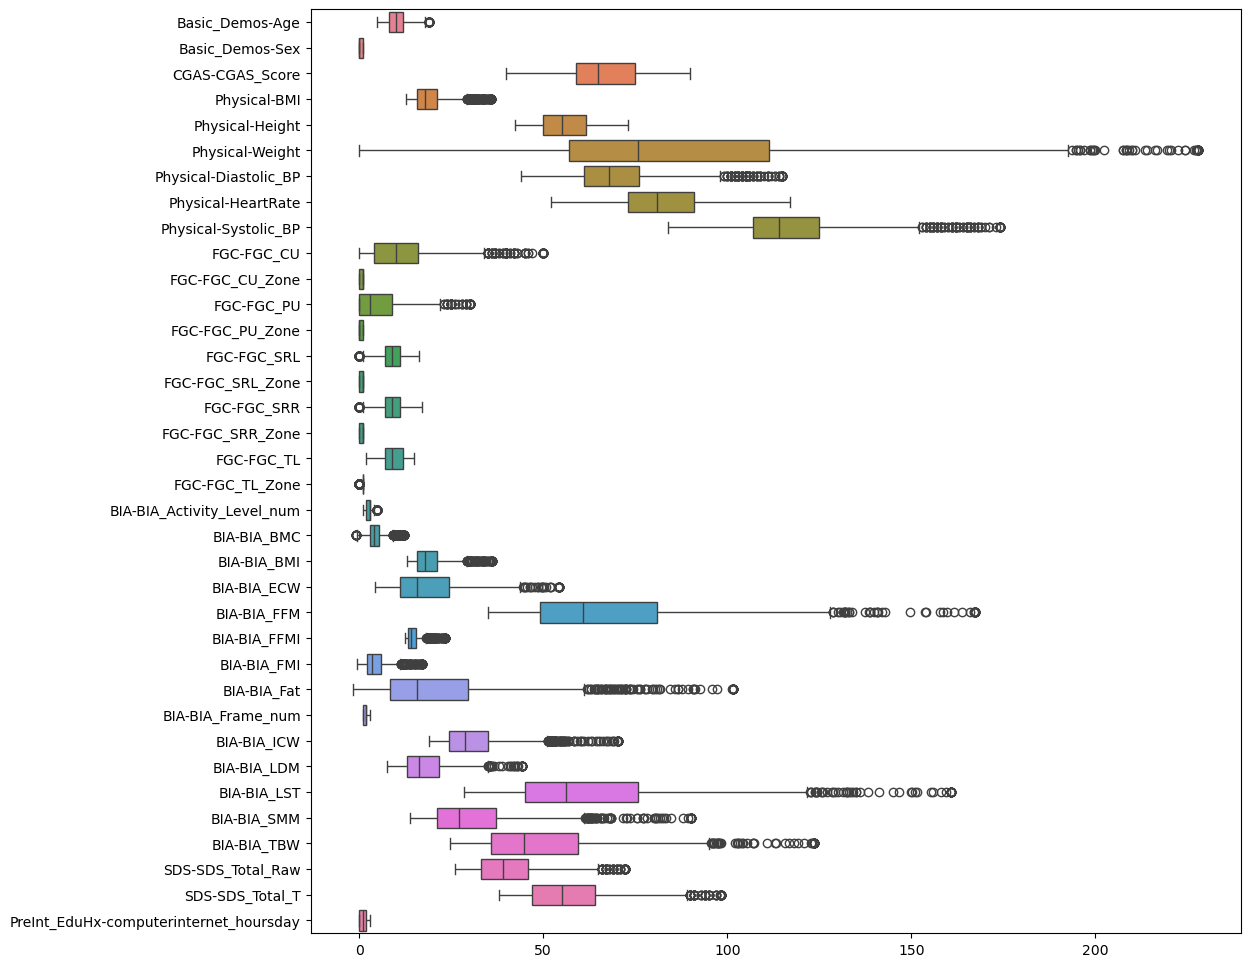

In [11]:
tmp_col = [col for col in num_columns if (col != 'BIA-BIA_BMR' and col != 'BIA-BIA_DEE')]
plt.figure(figsize=(12,12))
sns.boxplot(df[tmp_col], orient='h')

<Axes: >

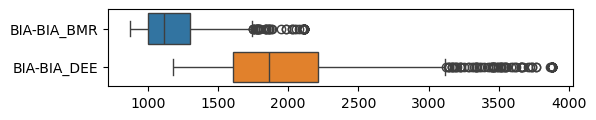

In [12]:
tmp_col = [col for col in num_columns if (col == 'BIA-BIA_BMR' or col == 'BIA-BIA_DEE')]
plt.figure(figsize=(6,1))
sns.boxplot(df[tmp_col], orient='h')

In [13]:
df.describe().loc[['min', 'max']]

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,FGC-FGC_CU,FGC-FGC_CU_Zone,FGC-FGC_PU,FGC-FGC_PU_Zone,FGC-FGC_SRL,FGC-FGC_SRL_Zone,FGC-FGC_SRR,FGC-FGC_SRR_Zone,FGC-FGC_TL,FGC-FGC_TL_Zone,BIA-BIA_Activity_Level_num,BIA-BIA_BMC,BIA-BIA_BMI,BIA-BIA_BMR,BIA-BIA_DEE,BIA-BIA_ECW,BIA-BIA_FFM,BIA-BIA_FFMI,BIA-BIA_FMI,BIA-BIA_Fat,BIA-BIA_Frame_num,BIA-BIA_ICW,BIA-BIA_LDM,BIA-BIA_LST,BIA-BIA_SMM,BIA-BIA_TBW,PCIAT-PCIAT_01,PCIAT-PCIAT_02,PCIAT-PCIAT_03,PCIAT-PCIAT_04,PCIAT-PCIAT_05,PCIAT-PCIAT_06,PCIAT-PCIAT_07,PCIAT-PCIAT_08,PCIAT-PCIAT_09,PCIAT-PCIAT_10,PCIAT-PCIAT_11,PCIAT-PCIAT_12,PCIAT-PCIAT_13,PCIAT-PCIAT_14,PCIAT-PCIAT_15,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
min,5.0,0.0,40.0,12.831486,42.42,0.000,44.00,52.0,84.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,2.0,0.0,1.0,-0.931609,13.00020,870.8199,1177.013,4.282165,35.01676,12.42574,-0.566587,-1.688491,1.0,19.04658,7.547219,28.46145,13.84646,24.67301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,38.00,0.0,0.0
max,19.0,1.0,90.0,35.763663,73.00,227.946,114.84,117.0,174.0,50.0,1.0,30.0,1.0,16.165,1.0,17.0,1.0,15.0,1.0,5.0,12.077160,36.02461,2113.8900,3882.020,54.360870,167.42020,23.25433,17.026410,101.518800,3.0,70.37418,44.183390,160.78520,90.21757,123.64100,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,93.0,72.3,98.31,3.0,3.0


In [14]:
# Considering all Physical and BIA data that are <= less than or equal to 0 are errors
# we will replace it with NaN then impute (Age too)
physical_columns = [col for col in df.columns if col.split(sep='-')[0] == 'Physical']
BIA_columns = [col for col in df.columns if col.split(sep='-')[0] == 'BIA']
df[df['Basic_Demos-Age'] == 0] = np.nan
df[df[physical_columns + BIA_columns] <= 0] = np.nan

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2671 entries, 0 to 3958
Data columns (total 60 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Basic_Demos-Age                         2671 non-null   int64  
 1   Basic_Demos-Sex                         2671 non-null   int64  
 2   CGAS-CGAS_Score                         2288 non-null   float64
 3   Physical-BMI                            2466 non-null   float64
 4   Physical-Height                         2469 non-null   float64
 5   Physical-Weight                         2459 non-null   float64
 6   Physical-Diastolic_BP                   2417 non-null   float64
 7   Physical-HeartRate                      2425 non-null   float64
 8   Physical-Systolic_BP                    2417 non-null   float64
 9   FGC-FGC_CU                              1876 non-null   float64
 10  FGC-FGC_CU_Zone                         1841 non-null   float64
 

In [16]:
# Method 1 Using KNN imputer
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

# Divide into 5 cluster corresponding to 5 groups of PCIAT

# 5 is an intuitive guess, need to find optimal number of k-neighbours later.
imputer = KNNImputer(
    n_neighbors=5
)

feature_columns = [col for col in df.columns if 
                      col not in pciat_columns and
                      col != 'sii' and
                      col != 'id'
                 ]

X = np.array(df[feature_columns])
X_imputed = imputer.fit_transform(X)
df[feature_columns] = X_imputed

In [18]:
df['sii'].value_counts()

sii
0.0    1568
1.0     711
2.0     359
3.0      33
Name: count, dtype: int64

<h1>Method 1: Model 1: predicting individual PCIAT questions</h1>

In [66]:
# Model 1: Fitting with Random Forest Regressor using PCIAT to infer SII
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import cohen_kappa_score

# Step 1: Split train/test data
X = df[feature_columns] # df[feature_columns]
Y = df[pciat_columns]

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, train_size=0.8, test_size=0.2, stratify=df['sii'])

# Step 2: Build an ensemble tree for each PCIAT question
random_forest = {} # 20 forest for 20 questions, each forest contain 50 to 100 trees

for question in pciat_columns:
    if question == 'PCIAT-PCIAT_Total' or question == 'sii':
        continue
    
    forest = RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        max_depth=8,
        random_state=30,
        bootstrap=True
    )

    forest.fit(np.array(X_train),np.array(np.array(Y_train[question])))
    random_forest[question] = forest


<h1>Method1: Model 2: Boosting</h1>

In [61]:
boosted_forest = {} # 20 forest for 20 questions, each forest contain 50 to 100 trees

for question in pciat_columns:
    if question == 'PCIAT-PCIAT_Total' or question == 'sii':
        continue

    print(question)
    forest = GradientBoostingClassifier(
        n_estimators=50,
        criterion='friedman_mse',
        max_depth=8,
        random_state=42,
        warm_start=True
    )

    forest.fit(np.array(X_train),np.array(np.array(Y_train[question])))
    boosted_forest[question] = forest


PCIAT-PCIAT_01
PCIAT-PCIAT_02
PCIAT-PCIAT_03
PCIAT-PCIAT_04
PCIAT-PCIAT_05
PCIAT-PCIAT_06
PCIAT-PCIAT_07
PCIAT-PCIAT_08
PCIAT-PCIAT_09
PCIAT-PCIAT_10
PCIAT-PCIAT_11
PCIAT-PCIAT_12
PCIAT-PCIAT_13
PCIAT-PCIAT_14
PCIAT-PCIAT_15
PCIAT-PCIAT_16
PCIAT-PCIAT_17
PCIAT-PCIAT_18
PCIAT-PCIAT_19
PCIAT-PCIAT_20


<h1>Method 1 Validation</h1>

In [62]:
#Step 3: Testing
# Train result
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report

def validateByPCIAT(validation_target_X, validation_target_Y, forest, verbose=0):
    """
        verbose:
            None/0: return Kappa
            >=1: Return graph
            >=2: return individual_scoring
    """
    pciat = []
    pciat_total = []
    sii = []
    true_pciat_total = np.array(validation_target_Y['PCIAT-PCIAT_Total'])
    true_sii = np.array(validation_target_Y['sii'])
    
    for col in pciat_columns:
        if col == 'PCIAT-PCIAT_Total' or col == 'sii':
            continue
        pred = forest[col].predict(np.array(validation_target_X))
        pciat.append(pred)
        actual = np.array(validation_target_Y[col])
        if verbose >= 2:
            print(f"{col} F1 score: {f1_score(actual, pred, average='macro')} MSE: {mean_squared_error(actual, pred)}")
        
        
    pciat_total = np.sum(pciat, axis=0)
    for value in pciat_total: 
        if value <= 30: 
            sii.append(0)
        elif 31 <= value <= 49:
            sii.append(1)
        elif 50 <= value <= 79:
            sii.append(2)
        else:
            sii.append(3)

    if verbose >= 1:
        plt.figure(figsize=(3,3))
        sns.heatmap(confusion_matrix(true_sii, sii), annot=True, cmap='viridis')
    print(f"Kappa: {cohen_kappa_score(true_sii, sii, weights='quadratic')}")

In [67]:
print("Random forest result")
print("Train: ")
validateByPCIAT(X_train, Y_train, random_forest)
print("Test: ")
validateByPCIAT(X_val, Y_val, random_forest)

print("Gradient boosted forest result")
print("Train: ")
validateByPCIAT(X_train, Y_train, random_forest)
print("Test: ")
validateByPCIAT(X_val, Y_val, random_forest)

Random forest result
Train: 
Kappa: 0.7108358749385202
Test: 
Kappa: 0.2806467800817478
Gradient boosted forest result
Train: 
Kappa: 0.7108358749385202
Test: 
Kappa: 0.2806467800817478


<h1>Submission</h1>

In [ ]:
# Model 1 pipeline
# Load data
test_df = pd.read_csv(working_dir + 'test.csv')
pciat_questions = [
 'PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20']
                 
def transform(test_df):
    # Drop text features
    test_df = test_df.drop(dropped_cols, axis=1)
    test_df = test_df.loc[: ,~test_df.columns.str.contains('season', case=False)]

    # Get numeric columns
    num_columns = [col for col in test_df.columns if 
                      (col.split(sep='-')[0] != 'PCIAT' and col.split(sep='-')[0] != 'sii' and col != 'id')
                  ]

    # Value capping, use specific cap values acquired from training quantile capping
    for col in num_columns:
        if col == 'id':
            continue
        test_df[col] = test_df[col].clip(feature_cap[col]['lower'], feature_cap[col]['upper'])
        
    # Considering all Physical and BIA data that are <= less than or equal to 0 are errors
    # we will replace it with NaN then impute (Age too)
    physical_columns = [col for col in test_df.columns if col.split(sep='-')[0] == 'Physical']
    BIA_columns = [col for col in test_df.columns if col.split(sep='-')[0] == 'BIA']
    test_df[test_df['Basic_Demos-Age'] == 0] = np.nan
    test_df[test_df[physical_columns + BIA_columns] <= 0] = np.nan


    imputer = KNNImputer(
        n_neighbors=5
    )
    
    feature_columns = [col for col in test_df.columns if col != 'id']
    
    X = np.array(test_df[feature_columns])
    X_imputed = imputer.fit_transform(X)
    test_df[feature_columns] = X_imputed

    return test_df

def predict(test_df):
    feature_columns = [col for col in test_df.columns if col != 'id']

    X = test_df[feature_columns]

    pciat = []
    pciat_total = []
    sii = []
    
    for col in pciat_questions:
        pred = pciat_forest[col].predict(np.array(X))
        pciat.append(pred)
        
    pciat_total = np.sum(pciat, axis=0)
    for value in pciat_total: 
        if value <= 30: 
            sii.append(0)
        elif 31 <= value <= 49:
            sii.append(1)
        elif 50 <= value <= 79:
            sii.append(2)
        else:
            sii.append(3)
    return sii

test_df = transform(test_df)
pred = predict(test_df)


In [ ]:
output = pd.DataFrame({'id': test_df.id, 'sii': pred})
output.to_csv(output_dir + 'submission.csv', sep=',', index=False)